[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nagaoka-ai-innovationhub/basics-of-image-recognition-with-cnn/blob/master/08_input_and_display_images.ipynb)

# 画像の入力と表示

今まで、MNISTデータセットを使って演習を行ってきました。
MNISTデータセットは画像データがすでにNumPyの配列に格納された状態になっています。

しかし現実の画像データはNumPyの配列には格納されていませんので、変換してあげる必要があります。

ここでは、`tf.keras`で画像データを簡単に扱うためのクラス`ImageDataGenerator`を使っていきます。

In [2]:
# ColabでのTensorFlow 2.xのインストール
try:
    # %tensorflow_version は Colab 上でのみ使えます
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

# TensorFlowとtf.kerasのバージョン確認
print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


## 画像データの取得

今回は、TensorFlowのデモで使われている、クリエイティブ・コモンズでライセンスされた花の画像をまとめたものを取得しましょう。
なお、ダウンロードされるファイルは約218MBほどありますので、ご注意ください。

In [3]:
import pathlib
data_root_orig = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 51s 0us/step
/Users/administrator/.keras/datasets/flower_photos


ディレクトリ構成は以下のようになっています。
`rose`(バラ)、`sunflowers`(ひまわり)、`daisy`(ヒナギク)、`dandelion`(たんぽぽ)、`tulips`(チューリップ)
の5種類の花の画像が格納されています。

In [8]:
for item in data_root.iterdir():
    print(item)

/Users/administrator/.keras/datasets/flower_photos/roses
/Users/administrator/.keras/datasets/flower_photos/sunflowers
/Users/administrator/.keras/datasets/flower_photos/daisy
/Users/administrator/.keras/datasets/flower_photos/dandelion
/Users/administrator/.keras/datasets/flower_photos/tulips
/Users/administrator/.keras/datasets/flower_photos/LICENSE.txt


画像をいくつか見てみましょう。

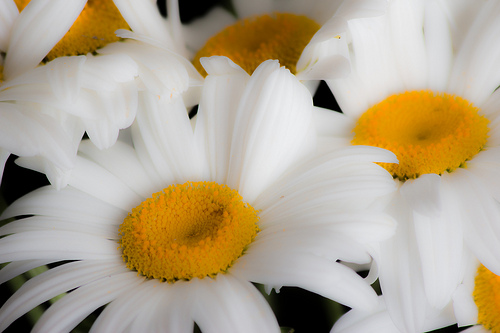

Image (CC BY 2.0)  by Andrew Moore



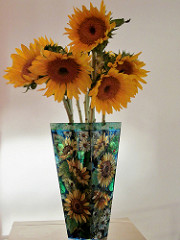

Image (CC BY 2.0)  by Upupa4me



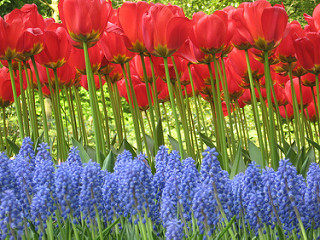

Image (CC BY 2.0)  by Michela Simoncini



In [7]:
import random
import IPython.display as display

# 画像をランダムに
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

# 画像のライセンス文字列を取得
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

# 画像の表示
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    print("Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1]))
    print()

## 画像のクラス名の定義

各画像のクラス名を決めたいと思います。
`ImageDataGenerator`はデフォルトではディレクトリ名がクラス名になり、クラス名順にラベルを０から割り当ててくれますが、
今回は明示的に決めていきます。

In [9]:
# クラス名の定義
class_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


`class_names`にクラス名が格納されました。このリストのインデックスがラベル名になります。

## 画像の入力

今回、画像の入力には`tf.keras`のクラスである`ImageDataGenerator`を使います。
`ImageDataGenerator`はリアルタイムにデータ拡張 (データ拡張については後述) しながら、
画像データのバッチを生成します。

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (128, 128)  # 入力データの縦横のサイズ。画像ファイルはこのサイズに自動的にリサイズされる。
batch_size = 32  # バッチサイズ。1度に取り込む入力データの数。

image_data_generator = ImageDataGenerator(rescale=1/255.0)     # 値の範囲を[0,1]に正規化
train_generator = image_data_generator.flow_from_directory(
    data_root,
    target_size=image_size,  # 画像サイズを指定
    batch_size=batch_size,   # バッチサイズを指定
    classes=class_names,      # クラスを指定 (data_root内にあるディレクトリ名がそのままクラス名になるので、そのリストのインデックスがラベルになる)
)

Found 3670 images belonging to 5 classes.


## 画像の表示

どんな画像が入力されたか、見てみましょう。

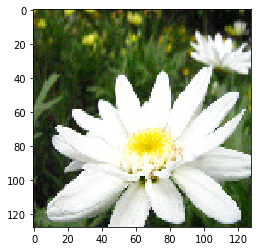

ラベル： daisy


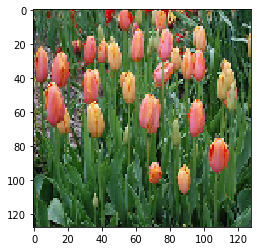

ラベル： tulips


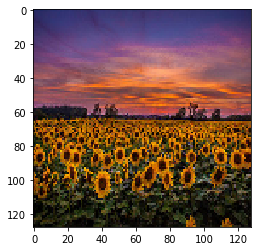

ラベル： sunflowers


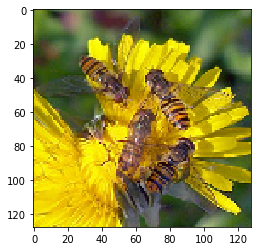

ラベル： dandelion


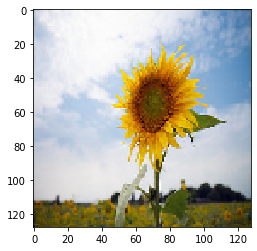

ラベル： sunflowers


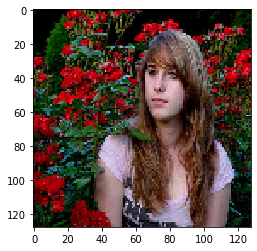

ラベル： roses


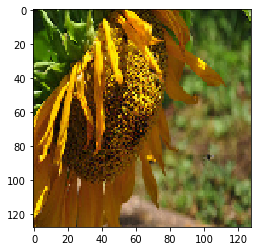

ラベル： sunflowers


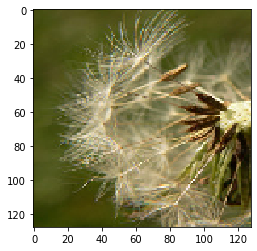

ラベル： dandelion


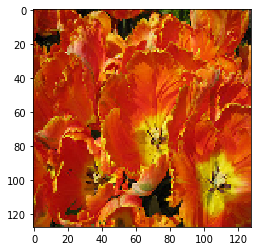

ラベル： tulips


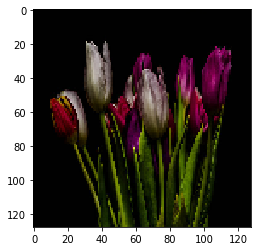

ラベル： tulips


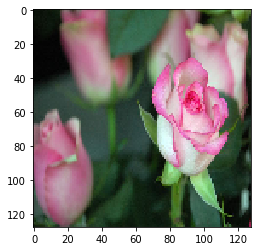

ラベル： roses


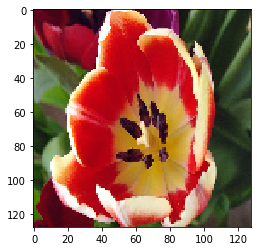

ラベル： tulips


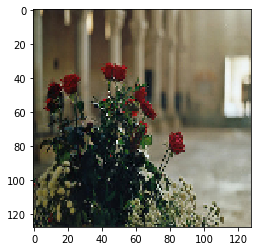

ラベル： roses


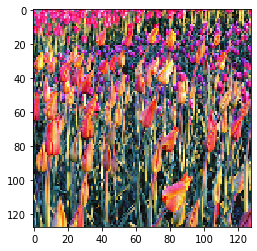

ラベル： tulips


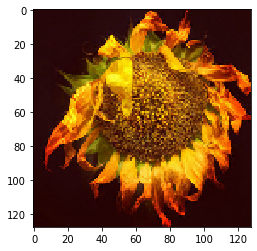

ラベル： sunflowers


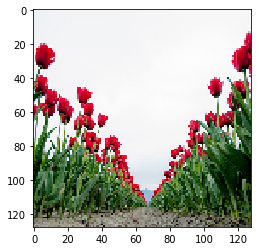

ラベル： tulips


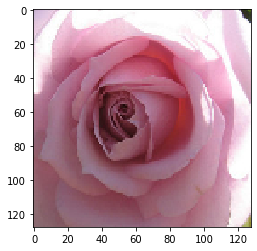

ラベル： roses


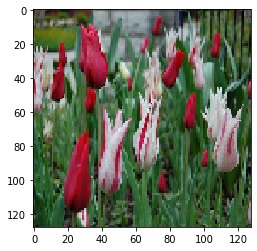

ラベル： tulips


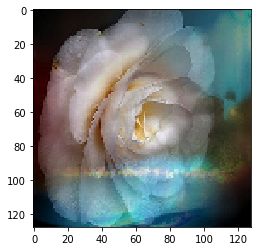

ラベル： roses


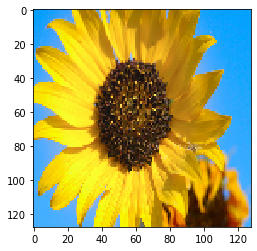

ラベル： sunflowers


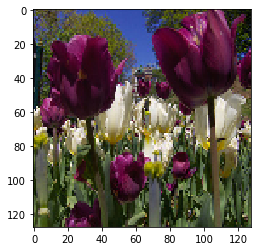

ラベル： tulips


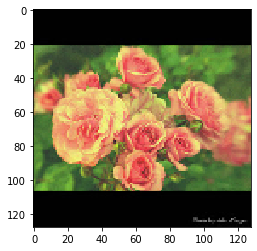

ラベル： roses


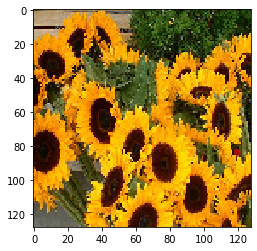

ラベル： sunflowers


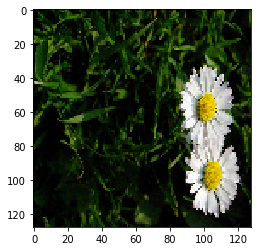

ラベル： daisy


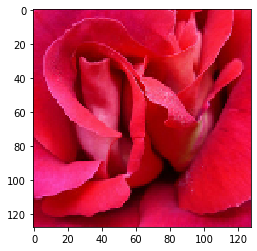

ラベル： roses


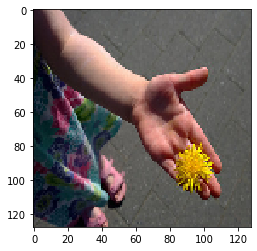

ラベル： dandelion


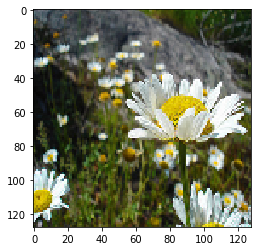

ラベル： daisy


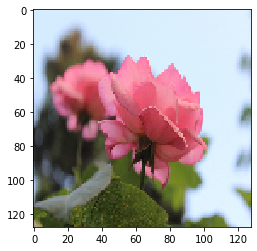

ラベル： roses


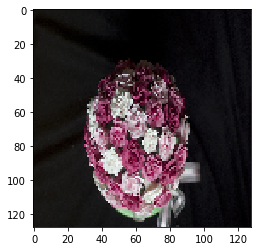

ラベル： roses


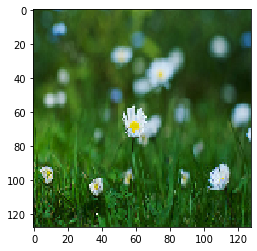

ラベル： daisy


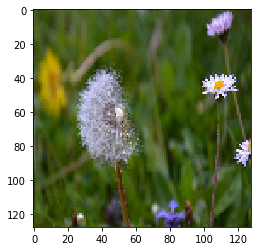

ラベル： dandelion


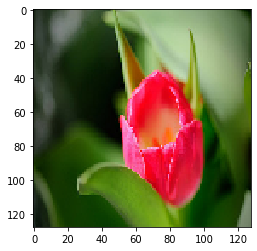

ラベル： tulips


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x, y = next(train_generator)   # バッチサイズ分だけ出力される

for i in range(len(x)):
    plt.imshow(x[i])
    plt.show()
    print('ラベル：', class_names[np.argmax(y[i])])

`ImageDataGenerator`を使うことで、簡単に画像ファイルを`tf.keras`で扱えるデータに変換できました。

## データ拡張

データ拡張 (data augmentation) とは、データに変換処理をかけて、データの"水増し"を行うテクニックの一つです。
`ImageDataGenerator`では、拡大・縮小・回転・反転などの処理をかけることができます。

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (128, 128)  # 入力データの縦横のサイズ。画像ファイルはこのサイズに自動的にリサイズされる。
batch_size = 32  # バッチサイズ。1度に取り込む入力データの数。

## データ拡張の例
image_data_generator = ImageDataGenerator(
    rescale=1/255.0,   # 値の範囲を[0,1]に正規化
    width_shift_range=0.1,  # ランダムに水平シフト
    height_shift_range=0.1,  # ランダムに垂直シフト
    shear_range=0.2,  # ランダムにシアー変換 (指定範囲内でのランダム角度で画像を引っ張る)
    zoom_range=0.2,  #  ランダムに　ズーム
    rotation_range=5,  # ランダムに回転する角度
    horizontal_flip=True  # 水平方向に反転
)

train_generator = image_data_generator.flow_from_directory(
    data_root,
    target_size=image_size,  # 画像サイズを指定
    batch_size=batch_size,   # バッチサイズを指定
    classes=class_names,      # クラスを指定 (data_root内にあるディレクトリ名がそのままクラス名になるので、そのリストのインデックスがラベルになる)
)

Found 3670 images belonging to 5 classes.


どんな画像が生成されているか見てみましょう。

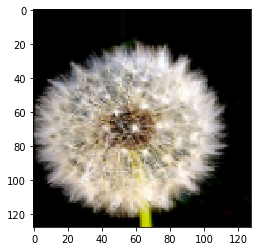

ラベル： dandelion


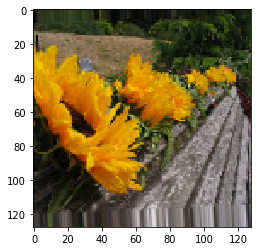

ラベル： sunflowers


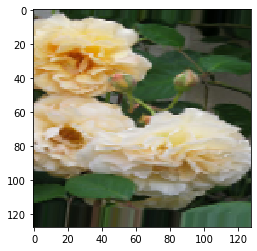

ラベル： roses


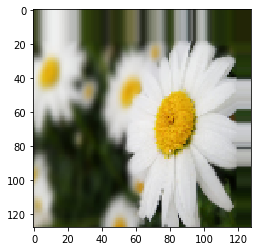

ラベル： daisy


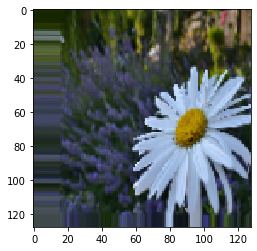

ラベル： daisy


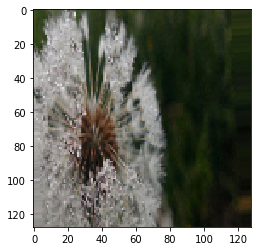

ラベル： dandelion


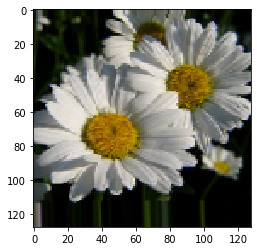

ラベル： daisy


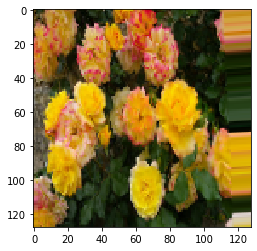

ラベル： roses


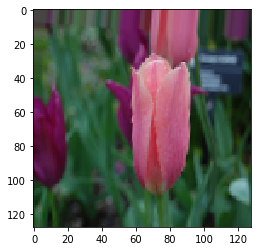

ラベル： tulips


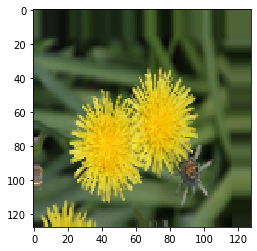

ラベル： dandelion


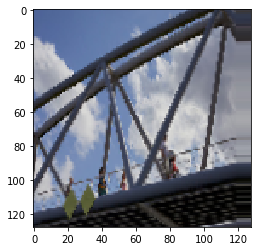

ラベル： tulips


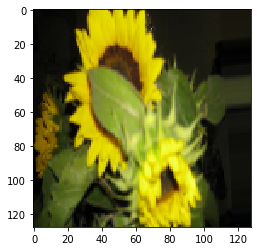

ラベル： sunflowers


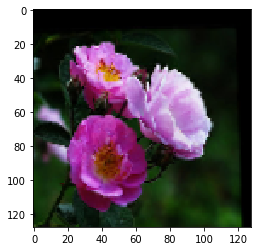

ラベル： roses


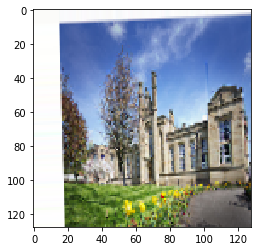

ラベル： tulips


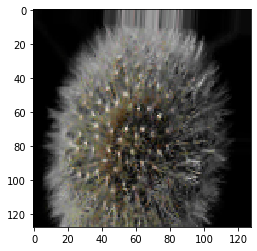

ラベル： dandelion


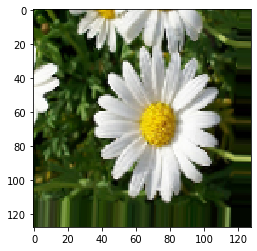

ラベル： daisy


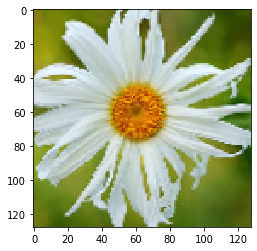

ラベル： daisy


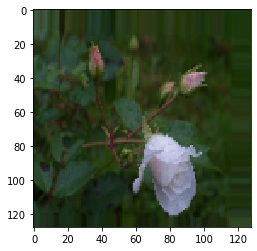

ラベル： roses


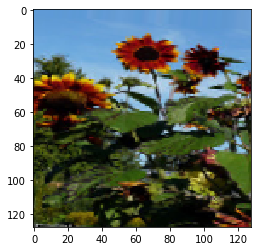

ラベル： sunflowers


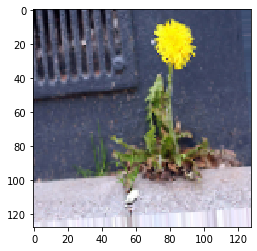

ラベル： dandelion


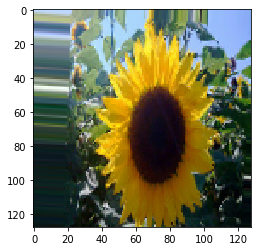

ラベル： sunflowers


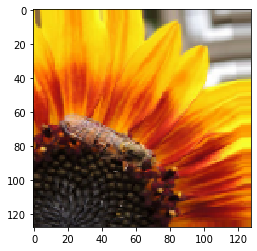

ラベル： sunflowers


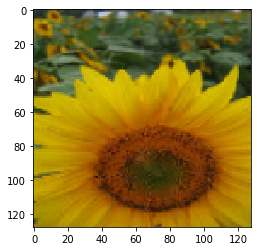

ラベル： sunflowers


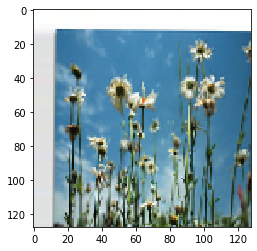

ラベル： daisy


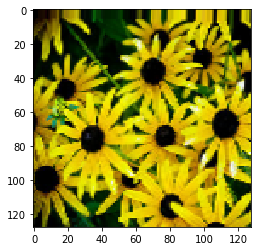

ラベル： sunflowers


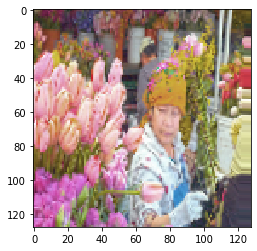

ラベル： tulips


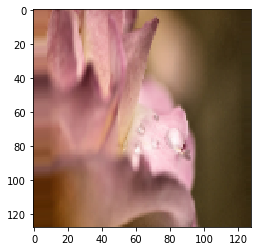

ラベル： roses


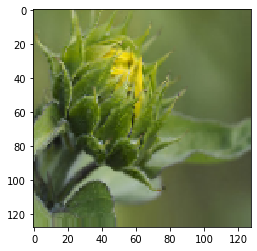

ラベル： sunflowers


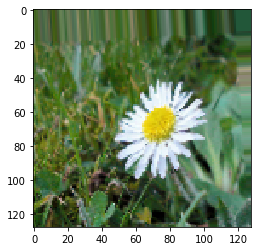

ラベル： daisy


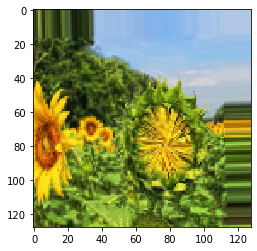

ラベル： sunflowers


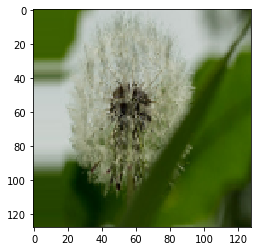

ラベル： dandelion


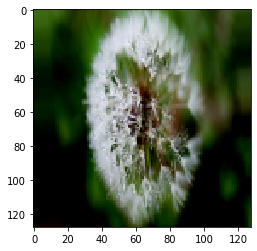

ラベル： dandelion


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x, y = next(train_generator)   # バッチサイズ分だけ出力される

for i in range(len(x)):
    plt.imshow(x[i])
    plt.show()
    print('ラベル：', class_names[np.argmax(y[i])])